In [1]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [2]:
data = pd.read_csv('main5000.csv')


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#no of rows and columns
data.shape

(5000, 10)

In [5]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car_Make                   4945 non-null   object
 1   Car_Model                  5000 non-null   object
 2   Year                       5000 non-null   int64 
 3   Kms_Driven                 5000 non-null   int64 
 4   Engine_Oil_Change          5000 non-null   int64 
 5   Brake_Pad_Change           5000 non-null   int64 
 6   Transmission_Fluid_Change  5000 non-null   int64 
 7   Tire_Rotation              5000 non-null   int64 
 8   Spark_Plug_Change          5000 non-null   int64 
 9   Maintenance_Required       5000 non-null   object
dtypes: int64(7), object(3)
memory usage: 390.8+ KB


In [6]:
#for first 5 rows
data.head()

Car_Make  Car_Model  Year  Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
0   Maruti  i20Active  2020       24624              12159             28288   
1  Hyundai  i20Active  2020       29493               4448             22148   
2     Tata   Carnival  2019        5512              10908             28096   
3     Ford      Creta  2020       31971               8770             23909   
4   Maruti      Amaze  2021       29037             103978             24611   

   Transmission_Fluid_Change  Tire_Rotation  Spark_Plug_Change  \
0                      22924          15438              21592   
1                      23945          34746              38347   
2                      48221          23269              27282   
3                      24916          18510              83727   
4                     161051          40708              96194   

  Maintenance_Required  
0              Absence  
1              Absence  
2             Presence  
3             Presence  
4              Absence

In [7]:
#for last 5 rows
data.tail()

Car_Make  Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
4995  MarutiSuzuki   Carnival  2013       82137             151000   
4996  MarutiSuzuki  NaAbsence  2023      261537              90425   
4997         Honda  i20Active  2020        4078              12391   
4998          Ford    Harrier  2018       44442              10721   
4999          Tata   Carnival  2008       18204              12149   

      Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
4995            106872                     129771         144411   
4996            135500                     155431         150760   
4997             28249                      25899          29588   
4998             17813                      41348          37449   
4999             23517                      19484          23907   

      Spark_Plug_Change Maintenance_Required  
4995              87417             Presence  
4996              87411              Absence  
4997              15586             Presence  
4998              38226             Presence  
4999              18342             Presence

In [8]:
#statistical measures about the data
data.describe().T

count        mean           std      min  \
Year                       5000.0   2018.8486      3.347943   2008.0   
Kms_Driven                 5000.0  51139.4640  70294.364636   3000.0   
Engine_Oil_Change          5000.0  36311.1648  48049.065529   4053.0   
Brake_Pad_Change           5000.0  52619.6372  42854.529859   7000.0   
Transmission_Fluid_Change  5000.0  72661.1230  49429.083078  10000.0   
Tire_Rotation              5000.0  55873.5198  53407.425557    500.0   
Spark_Plug_Change          5000.0  55016.1830  43029.083385  10000.0   

                                25%      50%       75%       max  
Year                        2017.00   2020.0    2021.0    2023.0  
Kms_Driven                 11583.25  23278.0   43345.0  400217.0  
Engine_Oil_Change          10260.75  11758.5   25120.0  151000.0  
Brake_Pad_Change           23784.25  31215.0   68491.5  153000.0  
Transmission_Fluid_Change  30518.25  51760.0  105824.5  200000.0  
Tire_Rotation              22014.50  28030.5   74999.5  250000.0  
Spark_Plug_Change          23679.50  35345.0   85233.5  308842.0

In [9]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make                     55
Car_Model                     0
Year                          0
Kms_Driven                    0
Engine_Oil_Change             0
Brake_Pad_Change              0
Transmission_Fluid_Change     0
Tire_Rotation                 0
Spark_Plug_Change             0
Maintenance_Required          0
dtype: int64

<Axes: >

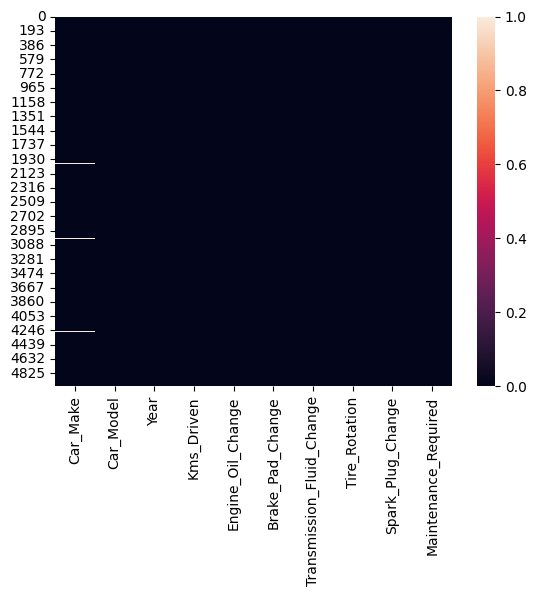

In [10]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [11]:
data.dtypes

Car_Make                     object
Car_Model                    object
Year                          int64
Kms_Driven                    int64
Engine_Oil_Change             int64
Brake_Pad_Change              int64
Transmission_Fluid_Change     int64
Tire_Rotation                 int64
Spark_Plug_Change             int64
Maintenance_Required         object
dtype: object

### **Data Cleaning And Visualization**

In [12]:
data = data.drop('Car_Make', axis=1)


In [13]:
data = data.drop('Car_Model', axis=1)


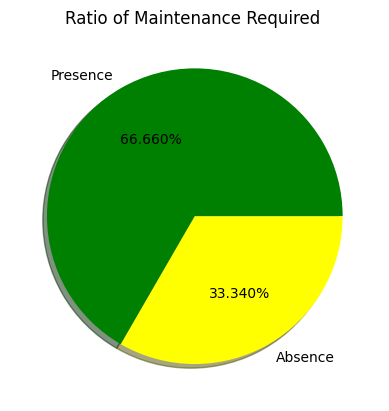

In [14]:
#To show the Fuel type using pie chart
plt.pie(x = data['Maintenance_Required'].value_counts() ,autopct='%1.3f%%' ,labels=['Presence', 'Absence'], colors=['green', 'yellow'], shadow=True)
plt.title('Ratio of Maintenance Required ')
plt.show()


In [15]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Engine_Oil_Change',x='Maintenance_Required')

<Axes: xlabel='Maintenance_Required', ylabel='count'>

ValueError: Image size of 850x77317 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

In [16]:
data["Year_old"]=2024-data["Year"]

In [17]:
data = data.drop('Year', axis=1)


In [18]:
# FMaintenance required to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Maintenance_Required"] = encoder.fit_transform(data["Maintenance_Required"])

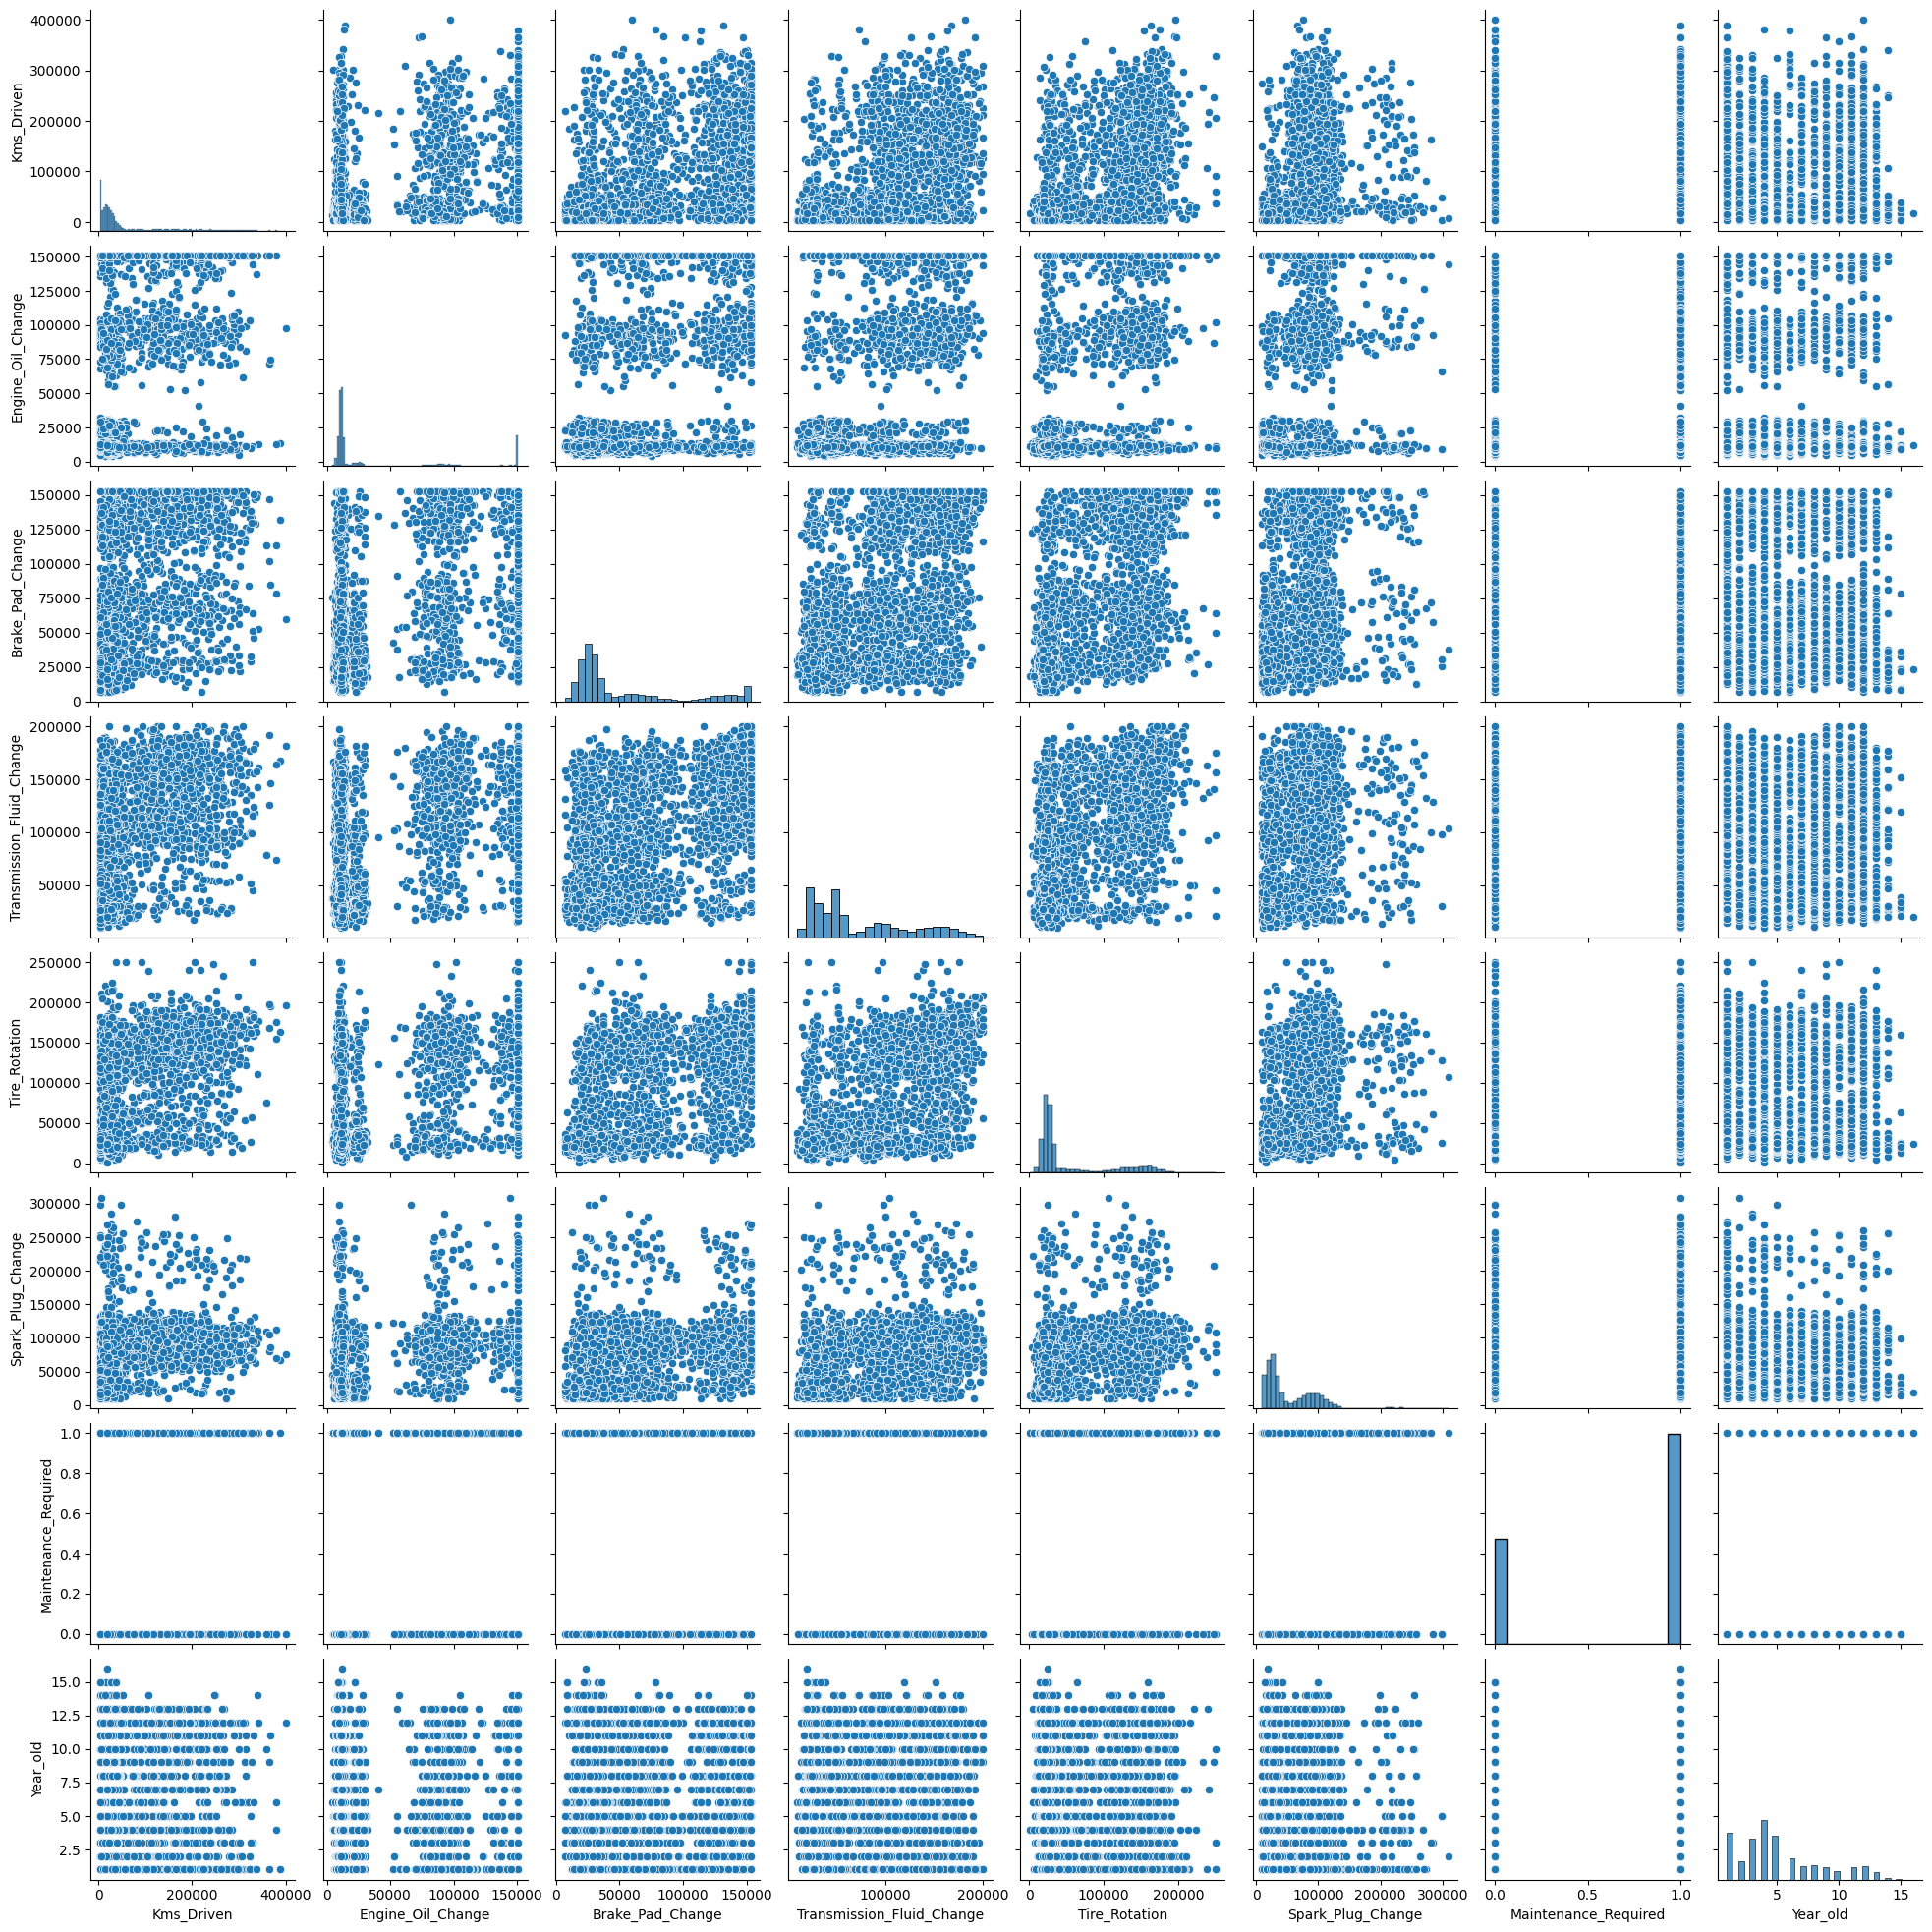

In [19]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Engine_Oil_Change'}>,
        <Axes: title={'center': 'Brake_Pad_Change'}>],
       [<Axes: title={'center': 'Transmission_Fluid_Change'}>,
        <Axes: title={'center': 'Tire_Rotation'}>,
        <Axes: title={'center': 'Spark_Plug_Change'}>],
       [<Axes: title={'center': 'Maintenance_Required'}>,
        <Axes: title={'center': 'Year_old'}>, <Axes: >]], dtype=object)

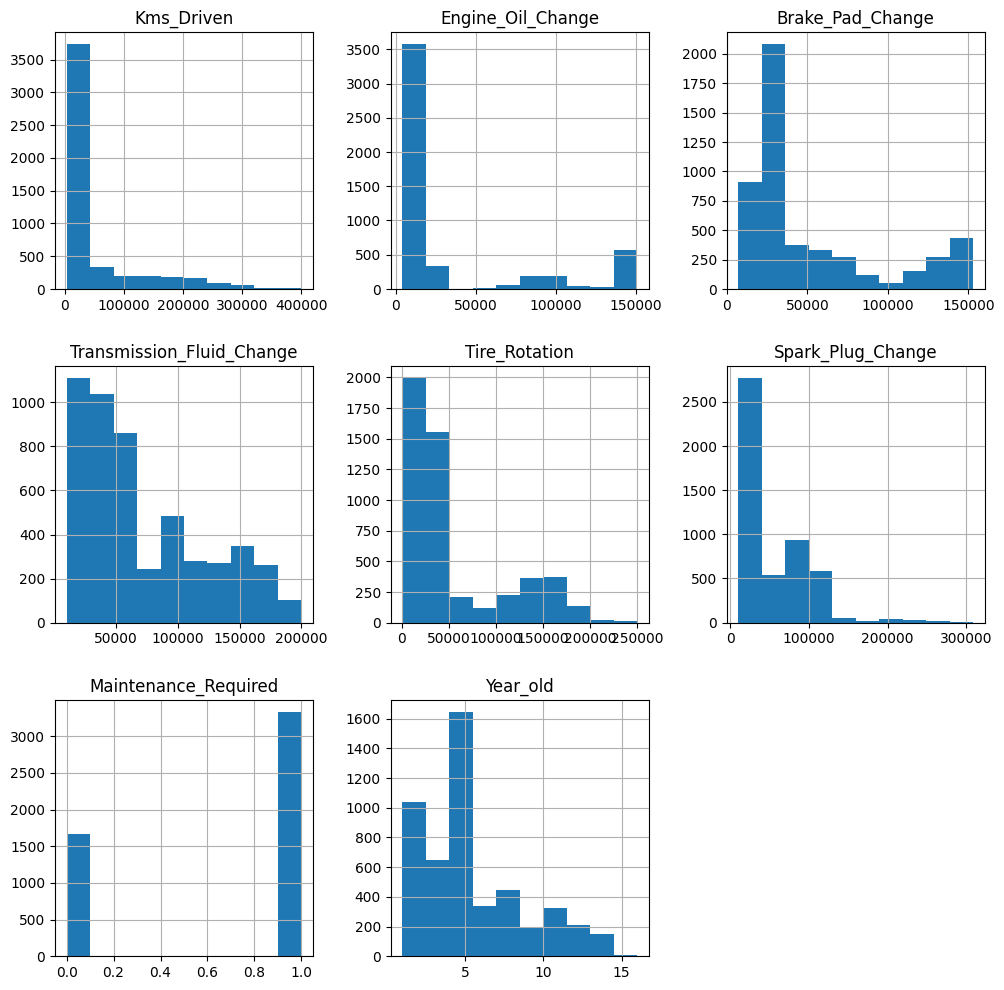

In [20]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [21]:
print(data.corr())


                           Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
Kms_Driven                   1.000000           0.596408          0.597535   
Engine_Oil_Change            0.596408           1.000000          0.623075   
Brake_Pad_Change             0.597535           0.623075          1.000000   
Transmission_Fluid_Change    0.550460           0.594309          0.618956   
Tire_Rotation                0.634447           0.668394          0.675440   
Spark_Plug_Change            0.463365           0.467066          0.523151   
Maintenance_Required        -0.024848           0.027752          0.062900   
Year_old                    -0.009193          -0.018009         -0.007769   

                           Transmission_Fluid_Change  Tire_Rotation  \
Kms_Driven                                  0.550460       0.634447   
Engine_Oil_Change                           0.594309       0.668394   
Brake_Pad_Change                            0.618956       0.675440   
Transmission_

<Axes: >

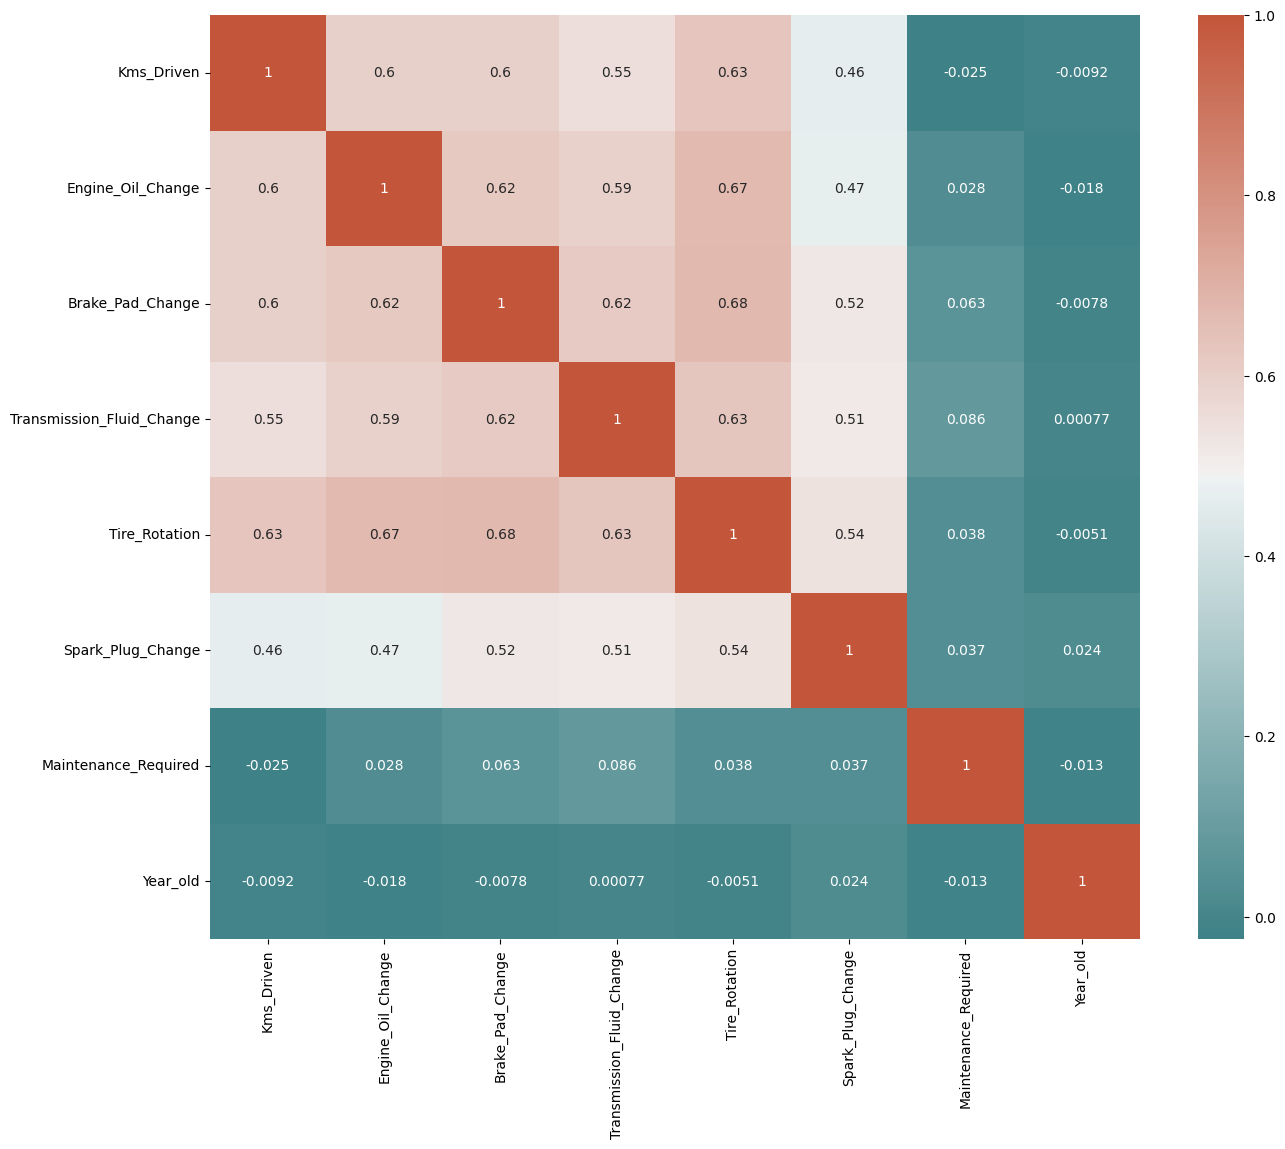

In [22]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [23]:
#Training and testing
X = data.drop('Maintenance_Required',axis=1)
y = data['Maintenance_Required']

In [24]:
# Checking For Important Features!
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
model.feature_importances_

array([0.15856911, 0.13205133, 0.15308895, 0.15543831, 0.14347023,
       0.14224421, 0.11513786])

<Axes: >

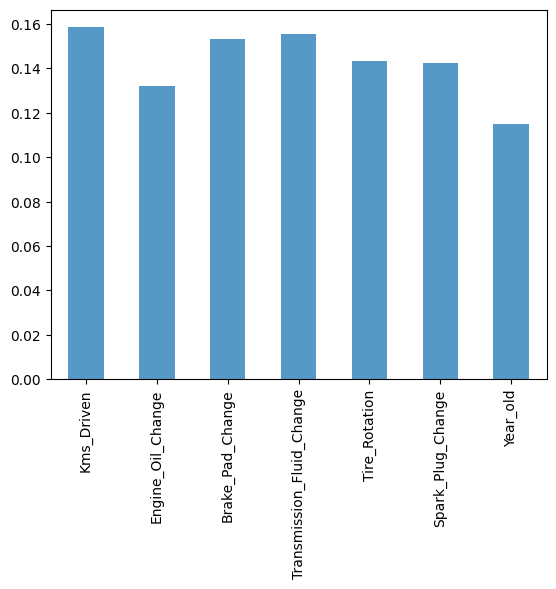

In [26]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90)

In [27]:
#statistical measures about the data
data.describe().T

count        mean           std      min  \
Kms_Driven                 5000.0  51139.4640  70294.364636   3000.0   
Engine_Oil_Change          5000.0  36311.1648  48049.065529   4053.0   
Brake_Pad_Change           5000.0  52619.6372  42854.529859   7000.0   
Transmission_Fluid_Change  5000.0  72661.1230  49429.083078  10000.0   
Tire_Rotation              5000.0  55873.5198  53407.425557    500.0   
Spark_Plug_Change          5000.0  55016.1830  43029.083385  10000.0   
Maintenance_Required       5000.0      0.6666      0.471475      0.0   
Year_old                   5000.0      5.1514      3.347943      1.0   

                                25%      50%       75%       max  
Kms_Driven                 11583.25  23278.0   43345.0  400217.0  
Engine_Oil_Change          10260.75  11758.5   25120.0  151000.0  
Brake_Pad_Change           23784.25  31215.0   68491.5  153000.0  
Transmission_Fluid_Change  30518.25  51760.0  105824.5  200000.0  
Tire_Rotation              22014.50  28030.5   74999.5  250000.0  
Spark_Plug_Change          23679.50  35345.0   85233.5  308842.0  
Maintenance_Required           0.00      1.0       1.0       1.0  
Year_old                       3.00      4.0       7.0      16.0

In [28]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [29]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (4000, 7)
Shape of y_train (4000,)
Shape of X_test (1000, 7)
Shape of y_test (1000,)


Decision Tree
ACCURACY score on train data 68.35
Accuracy Score on test data 64.8
Classification Report
               precision    recall  f1-score   support

           0       0.44      0.20      0.28       332
           1       0.69      0.87      0.77       668

    accuracy                           0.65      1000
   macro avg       0.56      0.54      0.52      1000
weighted avg       0.60      0.65      0.61      1000
 

Confusion Matrix
 [[ 68 264]
 [ 88 580]]


<Axes: >

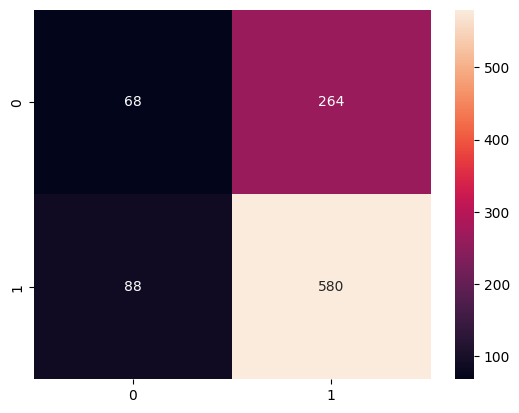

In [31]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Naive Bayes
ACCURACY score on train data 66.7
ACCURACY on test data 66.2
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.67      0.99      0.80       668

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000
 

Confusion Matrix [[  0 332]
 [  6 662]]


<Axes: >

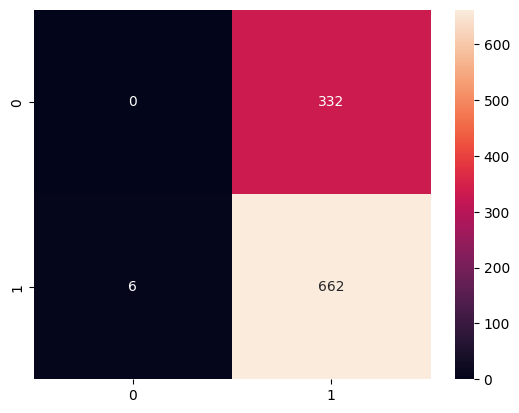

In [32]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 66.55
Accuracy Score on test data 66.10000000000001
Classification Report
               precision    recall  f1-score   support

           0       0.23      0.01      0.02       332
           1       0.67      0.99      0.80       668

    accuracy                           0.66      1000
   macro avg       0.45      0.50      0.41      1000
weighted avg       0.52      0.66      0.54      1000
 

Confusion Matrix [[  3 329]
 [ 10 658]]


<Axes: >

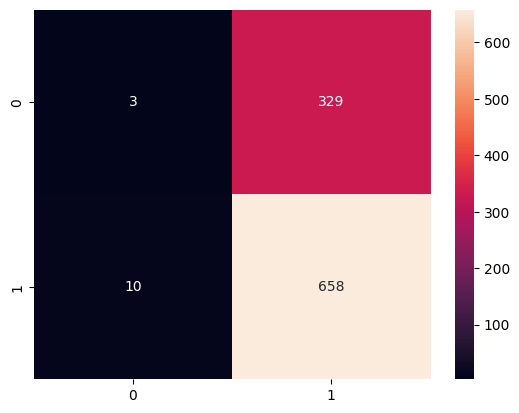

In [33]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [34]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 35


KNN


ACCURACY score on train data 67.7
Accuracy Score on test data 66.7
Classification Report
               precision    recall  f1-score   support

           0       0.49      0.08      0.13       332
           1       0.68      0.96      0.79       668

    accuracy                           0.67      1000
   macro avg       0.58      0.52      0.46      1000
weighted avg       0.61      0.67      0.57      1000
 

Confusion Matrix
 [[ 25 307]
 [ 26 642]]


<Axes: >

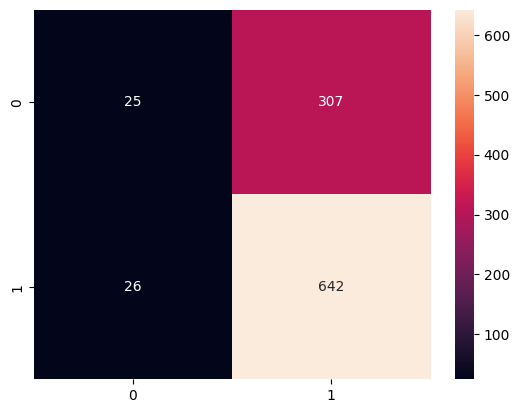

In [78]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=35,metric="minkowski")
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


In [36]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 501}


Random Forest Classification
ACCURACY score on train data 66.9
Accuracy Score on test data 66.8
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       332
           1       0.67      1.00      0.80       668

    accuracy                           0.67      1000
   macro avg       0.58      0.50      0.41      1000
weighted avg       0.61      0.67      0.54      1000
 

Confusion Matrix [[  2 330]
 [  2 666]]


<Axes: >

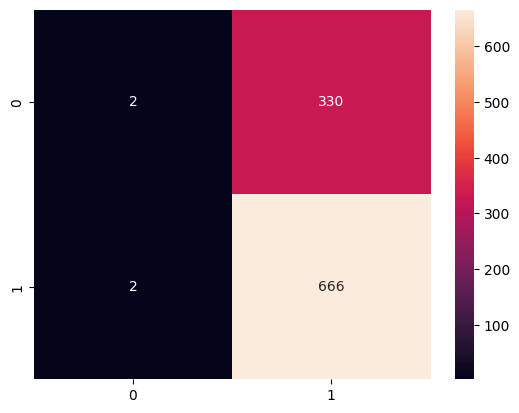

In [37]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 501, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [38]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.668, 0.667, 0.666, 0.572]


SVM
ACCURACY score on train data 66.625
Accuracy Score on test data 66.8
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.67      1.00      0.80       668

    accuracy                           0.67      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.45      0.67      0.54      1000
 

Confusion Matrix [[  0 332]
 [  0 668]]


<Axes: >

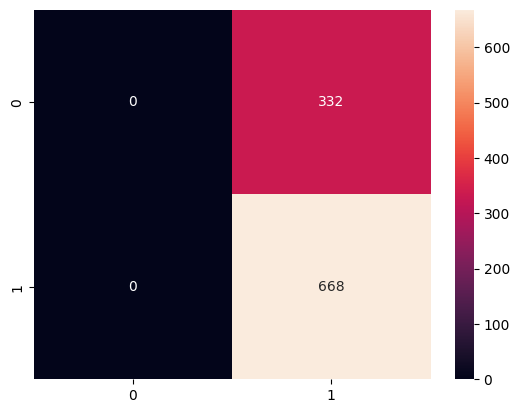

In [79]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='linear')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [80]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms  Accuracy
0        Decision Tree      64.8
1          K Neighbors      66.7
2          Naive Bayes      66.2
3  Logistic Regression      66.1
4        Random Forest      66.8
5                  SVM      66.8

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

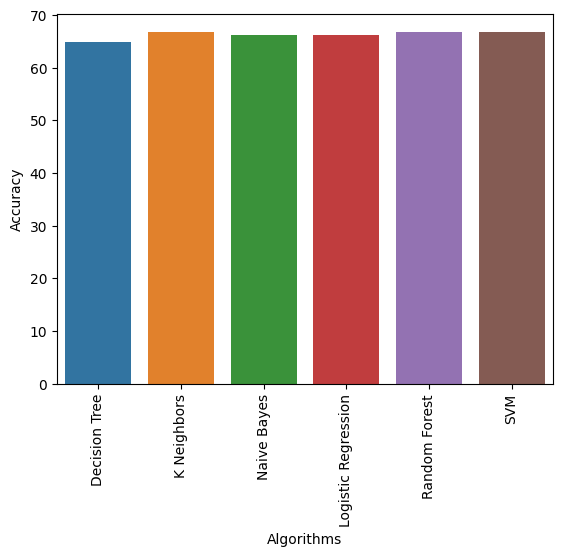

In [81]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

### **Exporting the tested model to a pickle file**

In [82]:
import pickle
with open('main5000.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(rf_classifier, file)

In [83]:
#To give input we show data here
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       24624              12159             28288                      22924   
1       29493               4448             22148                      23945   
2        5512              10908             28096                      48221   
3       31971               8770             23909                      24916   
4       29037             103978             24611                     161051   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          15438              21592                     0         4  
1          34746              38347                     0         4  
2          23269              27282                     1         5  
3          18510              83727                     1         4  
4          40708              96194                     0         3

In [91]:
#Here we give input to model and predict
predicted = nb_model.predict([[31971,8770,23909,24916,18510,83727,4]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 1
Need of maintanance


Applying Explainable AI


In [45]:
#importing shap 
import shap
import matplotlib.pyplot as plt

Variable Importance Plot - Global Interpretation


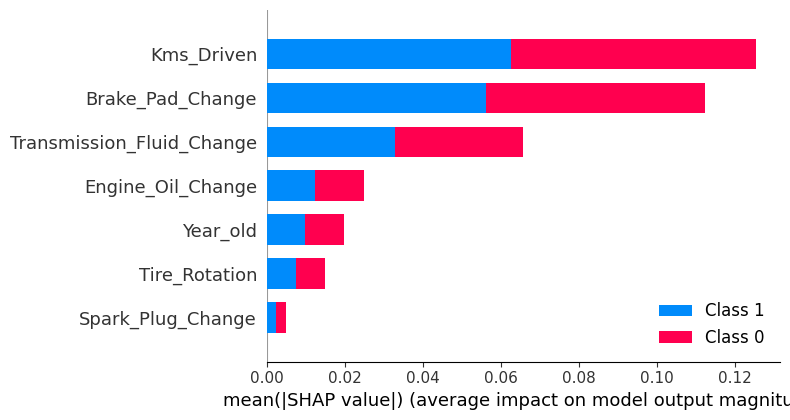

In [46]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


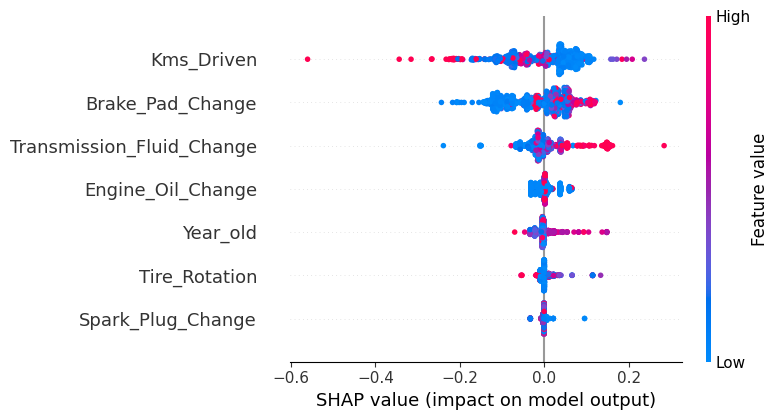

In [47]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


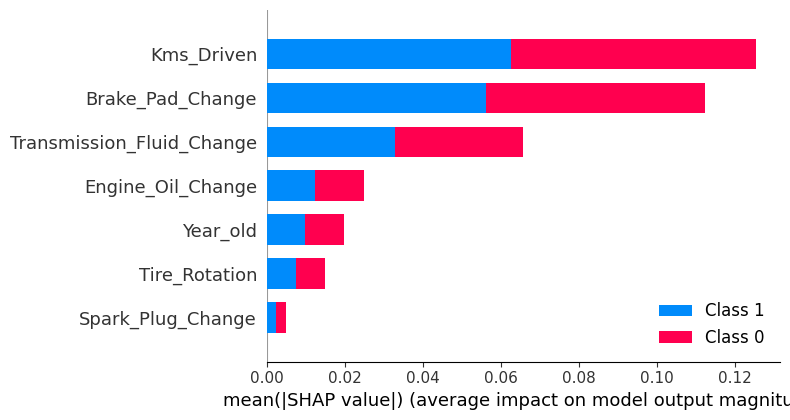

In [48]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


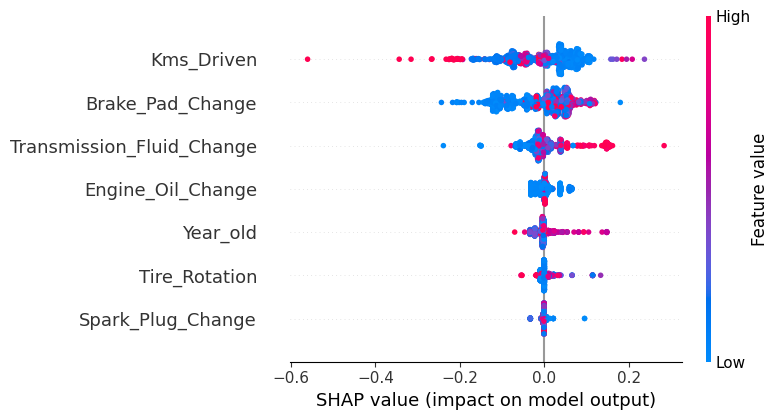

In [49]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

In [50]:
feature_importances = tree.feature_importances_

In [51]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(tree, X_train)

In [52]:
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [53]:
# Make predictions
y_pred = tree.predict(X_test)

In [54]:
# Print individual SHAP explanations for a specific instance 
instance_index = 0
print("Predicted Class:", y_pred[instance_index])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[instance_index], X_test[instance_index])

Predicted Class: 1


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Kms_Driven'),
  Text(1, 0, 'Engine_Oil_Change'),
  Text(2, 0, 'Brake_Pad_Change'),
  Text(3, 0, 'Transmission_Fluid_Change'),
  Text(4, 0, 'Tire_Rotation'),
  Text(5, 0, 'Spark_Plug_Change'),
  Text(6, 0, 'Year_old')])

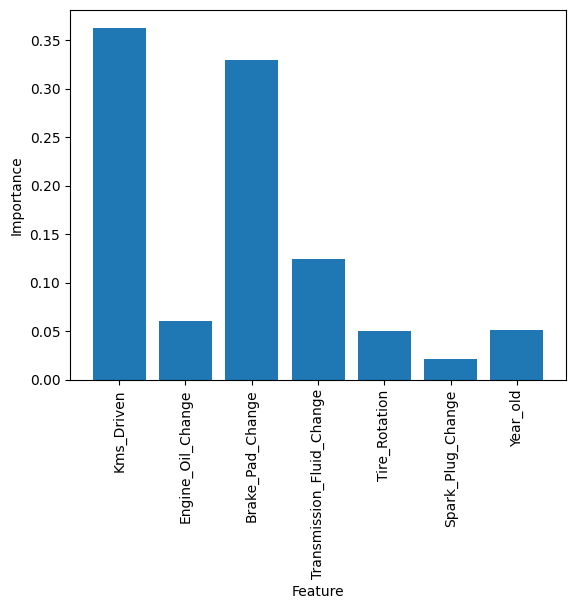

In [55]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90) 


In [56]:
#Importing LIME
import lime
from lime import lime_tabular

In [57]:
from interpret.blackbox import LimeTabular

In [58]:
from lime.lime_tabular import LimeTabularExplainer

In [59]:
from interpret import show

In [60]:
import pipeline

In [61]:
X_train_df = pd.DataFrame(X_train, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [62]:
X_test_df = pd.DataFrame(X_test, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [63]:
explainer = LimeTabularExplainer(training_data=X_train,
                                 mode="classification",
                                 feature_names=X.columns,
                                 class_names=["No need", "Need"],
                                 discretize_continuous=True,
                                 random_state=1)

In [64]:
predict_fn = lambda x: tree.predict_proba(x)

In [65]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [66]:
explanation.show_in_notebook()

In [67]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(25000,5000,20000,30000,15000,40000,5)]

In [68]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array)[0]

In [69]:
predict_fn = lambda x: tree.predict_proba(X_instance_array)

In [70]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], tree.predict_proba, top_labels=1)

In [71]:
explanation1.show_in_notebook()

In [72]:
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       24624              12159             28288                      22924   
1       29493               4448             22148                      23945   
2        5512              10908             28096                      48221   
3       31971               8770             23909                      24916   
4       29037             103978             24611                     161051   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          15438              21592                     0         4  
1          34746              38347                     0         4  
2          23269              27282                     1         5  
3          18510              83727                     1         4  
4          40708              96194                     0         3

In [73]:
#Here we give input to model and predict
predicted = lr_model.predict([[40000,5500,21000,33000,18000,38000,6]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 1
Need of maintanance


In [74]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(40000,5500,21000,33000,18000,38000,6)]

In [75]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array1)[0]

In [76]:
predict_fn = lambda x: tree.predict_proba(X_instance_array1)

In [77]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array1[0], tree.predict_proba, top_labels=1)
explanation1.show_in_notebook()